# Vienna, VA Real Estate Analytics

___________________________________________________________________

# What Factors are Valued Most in Residential Real Estate?

https://www.bloomberg.com/news/articles/2022-02-10/u-s-foreclosures-rose-in-january-after-end-of-pandemic-freeze

As of the beginning of 2022, foreclosures are on the rise. Coupled with the fact that home purchases tends to be the largest purchase a person makes in their lifetime, it can be catastrophic to make a mistake when buying a home. 

With this comes the topic of real estate and the decisions homebuyers make. While emotional connections and gut feelings can be important when purchasing a home, there are more objective factors relating to a home (lot size, home size, bedrooms, bathrooms, etc.) that may be important to consider in terms of home value. It can be speculated that if a family is ever in a financial pinch, the ability to sell a home quickly and for the highest price will provide relief and prevent devastating processes such as foreclosures. 

For this project, we will be using Vienna, VA as a case study. Vienna, VA is a suburb of Washington, DC that also happens to be my hometown. Since October of 2021, over 700 single family homes have been sold - these houses will comprise our data set. 

# Preliminary Analysis

Before we analyze each factor in terms of price, it may be useful to explore vienna as a whole. 

Let's load the data sets!

#### Importing libraries and loading datasets

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import requests
import json
import time
import math
import csv
from sklearn.model_selection import train_test_split

In [14]:
# DATA SETS

#DATA SET 1: 
vienna_va_simple_df = pd.read_csv('Vienna_Sold_Feb_2022_clean.csv')

#DATA SET 2:
vienna_va_prop_details = pd.read_csv('Vienna_Prop_Details_Feb_2022.csv')

#to show max columns
pd.set_option("display.max_columns", None)

In [41]:
# Potentially Useful Columns:
detail_columns = ['streetAddress',
                  'city',
                  'address.state',
                  'zipcode',
                  'price',
                  'dateSold',
                  'datePosted',
                  'zestimate',
                  'rentZestimate',
                  'homeStatus',
                  'latitude',
                  'longitude',
                  'bathrooms',
                  'bedrooms',
                  'livingArea',
                  'resoFacts.bathroomsHalf',
                  'resoFacts.bathroomsFull',
                  'resoFacts.mainLevelBathrooms',
                  'resoFacts.mainLevelBedrooms',
                  'resoFacts.yearBuilt',
                  'resoFacts.flooring',
                  'resoFacts.aboveGradeFinishedArea',
                  'resoFacts.belowGradeFinishedArea',
                  'resoFacts.carportSpaces',
                  'resoFacts.garageSpaces',
                  'resoFacts.parking',
                  'resoFacts.hasAttachedGarage',
                  'resoFacts.fireplaces',
                  'resoFacts.hasPrivatePool',
                  'resoFacts.spaFeatures',
                  'resoFacts.waterSource',
                  'resoFacts.sewer',
                  'resoFacts.lotSize',
                  'resoFacts.stories',
                  'resoFacts.levels',
                  'resoFacts.basement',
                  'resoFacts.elementarySchool',
                  'resoFacts.middleOrJuniorSchool',
                  'resoFacts.highSchool',
                  'resoFacts.architecturalStyle',
                  'resoFacts.interiorFeatures',
                  'resoFacts.hasAssociation',
                  'resoFacts.subdivisionName',
                  'resoFacts.heating',
                  'resoFacts.cooling',
                  'resoFacts.taxAnnualAmount',
                  'resoFacts.builderName',
                  'resoFacts.pricePerSquareFoot',
                  'listed_by.business_name',
                  'description',
                  'priceHistory',
                  'taxHistory',
                  'zpid'
                 ]

vienna_prop_details = vienna_va_prop_details[detail_columns]

### Column Names:

Many of the column names contain the 'resoFacts' prefix, which is not descriptive and creates visual clutter when reading column names. Luckily, they can be programatically removed. Basic string methods will come in handy. 

In [42]:
for column in vienna_prop_details.columns: 
    if column[0:9] == 'resoFacts':
        vienna_prop_details = vienna_prop_details.rename(columns = {column: column[10:]})

In [43]:
vienna_prop_details

,streetAddress,city,address.state,zipcode,price,dateSold,datePosted,zestimate,rentZestimate,homeStatus,latitude,longitude,bathrooms,bedrooms,livingArea,bathroomsHalf,bathroomsFull,mainLevelBathrooms,mainLevelBedrooms,yearBuilt,flooring,aboveGradeFinishedArea,belowGradeFinishedArea,carportSpaces,garageSpaces,parking,hasAttachedGarage,fireplaces,hasPrivatePool,spaFeatures,waterSource,sewer,lotSize,stories,levels,basement,elementarySchool,middleOrJuniorSchool,highSchool,architecturalStyle,interiorFeatures,hasAssociation,subdivisionName,heating,cooling,taxAnnualAmount,builderName,pricePerSquareFoot,listed_by.business_name,description,priceHistory,taxHistory,zpid
0,10610 Vickers Dr,Vienna,VA,22181,3000000,2022-02-11,2022-01-05,3298400.0,6347.0,RECENTLY_SOLD,38.912750,-77.314570,6.0,4.0,5138.0,2.0,4.0,3.0,1.0,2017.0,"['Wood', 'Wood Floors']","5,138",0,NaN,2.0,2,True,6.0,True,['Hot Tub'],['Well'],['Septic Exists'],5.02 Acres,3.0,Three,"Finished,Walkout Level,Windows",Oakton,Thoreau,Madison,Contemporary,"['Bar', 'Breakfast Area', 'Ceiling Fan(s)', 'C...",False,Difficult,"['Forced Air', 'Heat Pump', 'Natural Gas']","['Central A/C', 'Electric']",16859.0,NaN,584.0,"Washington Fine Properties, LLC","A custom built modern, yet perfectly practical...","[{'priceChangeRate': -0.090909090909091, 'date...","[{'time': 1613190988720, 'valueIncreaseRate': ...",51766633
1,2315 Tanglevale Dr,Vienna,VA,22181,901000,2022-02-11,2022-01-20,889500.0,3200.0,RECENTLY_SOLD,38.901722,-77.288086,3.0,4.0,2521.0,1.0,2.0,0.0,0.0,1969.0,"['Hardwood', 'Wood Floors']","1,681",840,1.0,NaN,1,False,1.0,NaN,NaN,['Public'],['Public Sewer'],0.28 Acres,3.0,"Split Level,Three","Side Entrance,Partially Finished,Walkout Level...",Flint Hill,NaN,NaN,NaN,"['Breakfast Area', 'Kitchen - Gourmet', 'Kitch...",True,Tanglewood,"['Central', 'Forced Air', 'Humidity Control', ...","['Attic Fan', 'Ceiling Fan(s)', 'Central A/C',...",6500.0,"Woodlawn Enterprises, Inc",357.0,"RE/MAX Distinctive Real Estate, Inc.",THE BEST HOME VALUE IN VIENNA! *BEAUTIFUL AND...,"[{'priceChangeRate': 0.0625, 'date': '2022-02-...","[{'time': 1613191006171, 'valueIncreaseRate': ...",51771108
2,9925 Coach Rd,Vienna,VA,22181,903500,2022-02-11,2022-01-13,910300.0,3650.0,RECENTLY_SOLD,38.916992,-77.290220,3.0,4.0,2850.0,1.0,2.0,1.0,3.0,1965.0,"['Wood', 'Carpet', 'Ceramic Tile', 'Wood Floors']","2,850",NaN,NaN,2.0,2,True,2.0,NaN,NaN,['Well'],['Septic = # of BR'],0.94 sqft,2.0,"Bi-level,Two",NaN,Flint Hill,Thoreau,Madison,NaN,"['Bar', 'Entry Level Bedroom', 'Formal/Separat...",False,Carriage Hill,"['Baseboard - Hot Water', 'Natural Gas']","['Central A/C', 'Electric']",9764.0,NaN,317.0,"Long & Foster Real Estate, Inc.",All brick home in Vienna’s sought after Carria...,"[{'priceChangeRate': 0.062941176470588, 'date'...","[{'time': 1613191007607, 'valueIncreaseRate': ...",51745471
3,1921 Aubrey Place Ct,Vienna,VA,22182,875000,2022-02-11,2022-01-19,849100.0,3494.0,RECENTLY_SOLD,38.919266,-77.283470,3.0,5.0,2226.0,1.0,2.0,2.0,3.0,1985.0,"['Carpet', 'Ceramic Tile']","2,026",200,NaN,2.0,2,True,1.0,NaN,NaN,['Public'],['Public Sewer'],"10,018 sqft",2.0,Two,"Partial,Full,Exterior Entry,Side Entrance,Part...",Wolftrap,Kilmer,Madison,Ranch/Rambler,"['Ceiling Fan(s)', 'Family Room Off Kitchen', ...",False,Aubrey Place,"['Heat Pump', 'Electric']","['Central A/C', 'Ceiling Fan(s)', 'Heat Pump',...",9297.0,NaN,393.0,"Avery-Hess, REALTORS",SPACIOUS 5BR/2.5BA wheelchair accessible brick...,"[{'priceChangeRate': 0.09375, 'date': '2022-02...","[{'time': 1613191008788, 'valueIncreaseRate': ...",51745950
4,518 Walker St SW,Vienna,VA,22180,795000,2022-02-10,2022-02-10,758700.0,3201.0,RECENTLY_SOLD,38.881930,-77.253296,0.0,0.0,1433.0,NaN,0.0,0.0,0.0,1960.0,NaN,"1,433",0,NaN,NaN,0,False,0.0,NaN,NaN,['Public'],['Public Septic'],0.36 Acres,1.0,One,NaN,NaN,NaN,NaN,Traditional,NaN,False,Vienna Woods,['Other'],['Other'],9246.0,NaN,555.0,Non Subscribing Office,A sprawling front yard leads the eye towards a...,"[{'priceChangeRate': 3.01515151515

In [44]:
#Average Price: 
print(np.average(vienna_prop_details['price'].to_numpy()))
#Standard Deviation:
print(np.std(vienna_prop_details['price'].to_numpy()))

1215191.0406162464
527094.0739556747


## Visualizing Price: 
The visualization below indicates that some incorrect values may be present in the data set. We can programatically remove items that have a high likelihood of being incorrect.

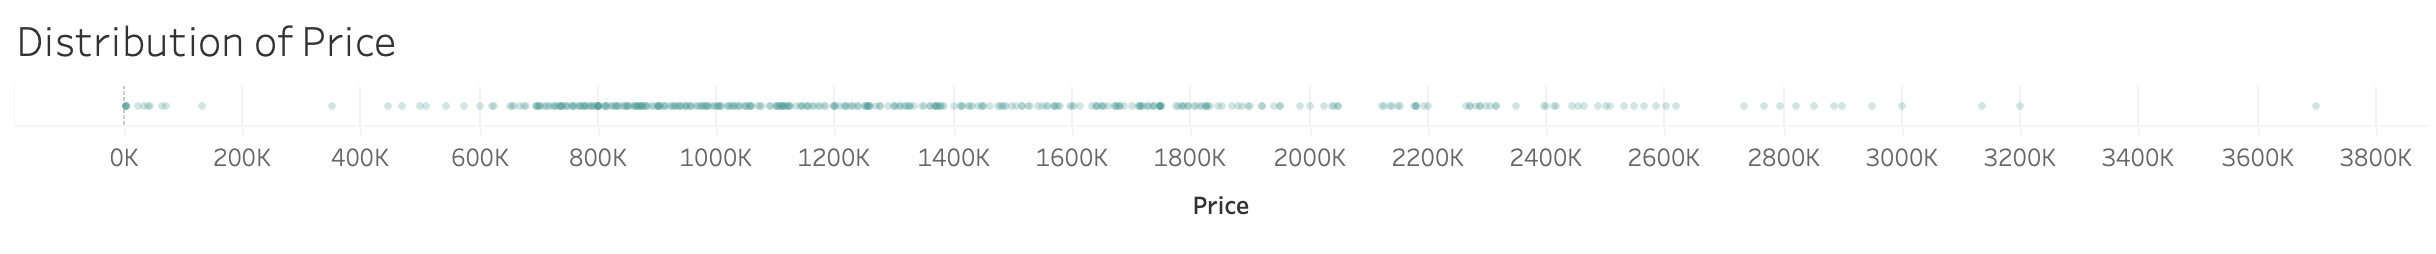

In [45]:
## The lotAreaUnit and lotAreaValue columns from the initial data set will be useful for changing all lot sizes 
## into acres. We will append these two columns onto the vienna_prop_details dataframe and define a function
## to change to acres.
vienna_prop_details['lotAreaUnit'] = vienna_va_simple_df['lotAreaUnit']
vienna_prop_details['lotAreaValue'] = vienna_va_simple_df['lotAreaValue']
vienna_prop_details

,streetAddress,city,address.state,zipcode,price,dateSold,datePosted,zestimate,rentZestimate,homeStatus,latitude,longitude,bathrooms,bedrooms,livingArea,bathroomsHalf,bathroomsFull,mainLevelBathrooms,mainLevelBedrooms,yearBuilt,flooring,aboveGradeFinishedArea,belowGradeFinishedArea,carportSpaces,garageSpaces,parking,hasAttachedGarage,fireplaces,hasPrivatePool,spaFeatures,waterSource,sewer,lotSize,stories,levels,basement,elementarySchool,middleOrJuniorSchool,highSchool,architecturalStyle,interiorFeatures,hasAssociation,subdivisionName,heating,cooling,taxAnnualAmount,builderName,pricePerSquareFoot,listed_by.business_name,description,priceHistory,taxHistory,zpid,lotAreaUnit,lotAreaValue
0,10610 Vickers Dr,Vienna,VA,22181,3000000,2022-02-11,2022-01-05,3298400.0,6347.0,RECENTLY_SOLD,38.912750,-77.314570,6.0,4.0,5138.0,2.0,4.0,3.0,1.0,2017.0,"['Wood', 'Wood Floors']","5,138",0,NaN,2.0,2,True,6.0,True,['Hot Tub'],['Well'],['Septic Exists'],5.02 Acres,3.0,Three,"Finished,Walkout Level,Windows",Oakton,Thoreau,Madison,Contemporary,"['Bar', 'Breakfast Area', 'Ceiling Fan(s)', 'C...",False,Difficult,"['Forced Air', 'Heat Pump', 'Natural Gas']","['Central A/C', 'Electric']",16859.0,NaN,584.0,"Washington Fine Properties, LLC","A custom built modern, yet perfectly practical...","[{'priceChangeRate': -0.090909090909091, 'date...","[{'time': 1613190988720, 'valueIncreaseRate': ...",51766633,sqft,5.020000
1,2315 Tanglevale Dr,Vienna,VA,22181,901000,2022-02-11,2022-01-20,889500.0,3200.0,RECENTLY_SOLD,38.901722,-77.288086,3.0,4.0,2521.0,1.0,2.0,0.0,0.0,1969.0,"['Hardwood', 'Wood Floors']","1,681",840,1.0,NaN,1,False,1.0,NaN,NaN,['Public'],['Public Sewer'],0.28 Acres,3.0,"Split Level,Three","Side Entrance,Partially Finished,Walkout Level...",Flint Hill,NaN,NaN,NaN,"['Breakfast Area', 'Kitchen - Gourmet', 'Kitch...",True,Tanglewood,"['Central', 'Forced Air', 'Humidity Control', ...","['Attic Fan', 'Ceiling Fan(s)', 'Central A/C',...",6500.0,"Woodlawn Enterprises, Inc",357.0,"RE/MAX Distinctive Real Estate, Inc.",THE BEST HOME VALUE IN VIENNA! *BEAUTIFUL AND...,"[{'priceChangeRate': 0.0625, 'date': '2022-02-...","[{'time': 1613191006171, 'valueIncreaseRate': ...",51771108,acres,0.280000
2,9925 Coach Rd,Vienna,VA,22181,903500,2022-02-11,2022-01-13,910300.0,3650.0,RECENTLY_SOLD,38.916992,-77.290220,3.0,4.0,2850.0,1.0,2.0,1.0,3.0,1965.0,"['Wood', 'Carpet', 'Ceramic Tile', 'Wood Floors']","2,850",NaN,NaN,2.0,2,True,2.0,NaN,NaN,['Well'],['Septic = # of BR'],0.94 sqft,2.0,"Bi-level,Two",NaN,Flint Hill,Thoreau,Madison,NaN,"['Bar', 'Entry Level Bedroom', 'Formal/Separat...",False,Carriage Hill,"['Baseboard - Hot Water', 'Natural Gas']","['Central A/C', 'Electric']",9764.0,NaN,317.0,"Long & Foster Real Estate, Inc.",All brick home in Vienna’s sought after Carria...,"[{'priceChangeRate': 0.062941176470588, 'date'...","[{'time': 1613191007607, 'valueIncreaseRate': ...",51745471,sqft,0.940000
3,1921 Aubrey Place Ct,Vienna,VA,22182,875000,2022-02-11,2022-01-19,849100.0,3494.0,RECENTLY_SOLD,38.919266,-77.283470,3.0,5.0,2226.0,1.0,2.0,2.0,3.0,1985.0,"['Carpet', 'Ceramic Tile']","2,026",200,NaN,2.0,2,True,1.0,NaN,NaN,['Public'],['Public Sewer'],"10,018 sqft",2.0,Two,"Partial,Full,Exterior Entry,Side Entrance,Part...",Wolftrap,Kilmer,Madison,Ranch/Rambler,"['Ceiling Fan(s)', 'Family Room Off Kitchen', ...",False,Aubrey Place,"['Heat Pump', 'Electric']","['Central A/C', 'Ceiling Fan(s)', 'Heat Pump',...",9297.0,NaN,393.0,"Avery-Hess, REALTORS",SPACIOUS 5BR/2.5BA wheelchair accessible brick...,"[{'priceChangeRate': 0.09375, 'date': '2022-02...","[{'time': 1613191008788, 'valueIncreaseRate': ...",51745950,sqft,10018.800000
4,518 Walker St SW,Vienna,VA,22180,795000,2022-02-10,2022-02-10,758700.0,3201.0,RECENTLY_SOLD,38.881930,-77.253296,0.0,0.0,1433.0,NaN,0.0,0.0,0.0,1960.0,NaN,"1,433",0,NaN,NaN,0,False,0.0,NaN,NaN,['Public'],['Public Septic'],0.36 Acres,1.0,One,NaN,NaN,NaN,NaN,Traditional,NaN,False,Vienna Woods,['Other'],['Other'],9246.0,NaN,555.0,Non Subscribing Office

Now that the lotAreaValue and lotAreaUnit columns have been added, we will define the change_to_acres function.

In [46]:
def change_to_acres(df):
    '''parameter is a dataframe in the format of the table extracted from the zillow api from rapid api. 
    it must contain the columns lotAreaValue and lotAreaUnit'''
    final_df = df.copy(deep=True)
    lot_size_column = df['lotAreaValue'].to_list()
    sqft_indexes = []
    counter = 0
    unit_column = df['lotAreaUnit'].to_list()
    for row in unit_column:
        if row == 'sqft':
            sqft_indexes.append(int(counter))
        counter+=1
        
    for item in sqft_indexes:
        if lot_size_column[item] > 500:
            lot_size_column[item] /= 43560
            
    unit_list = []
    for unit in range(len(df)):
        unit_list.append('acres')
    final_df['lotAreaUnit'] = unit_list
    final_df['lotAreaValue'] = lot_size_column
    return final_df


In [47]:
vienna_prop_details = change_to_acres(vienna_prop_details)

# Linear Correlation

Before find the linear correlation between features in the dataset, we need to remove all empty/NaN values columns with numerical data. 

In [48]:
def remove_null(df, column_list):
    df_copy = df.copy(deep=True)
    for column in column_list:
        df_copy.dropna(subset = [column], inplace = True) 
    return df_copy

# While other columns than the ones specified below contain numerical data, the other columns are much more
# inconsistent in terms of null values. In other to retain most of the rows, only the features below were 
# chosen. The linear correlation function call the remove_null function directly for any columns not specified
# below. 

vienna_prop_details = remove_null(vienna_prop_details, ['bathrooms', 'price', 'zestimate', 'bedrooms', 'lotAreaValue', 'livingArea',
                                 'longitude', 'latitude'])
vienna_prop_details

,streetAddress,city,address.state,zipcode,price,dateSold,datePosted,zestimate,rentZestimate,homeStatus,latitude,longitude,bathrooms,bedrooms,livingArea,bathroomsHalf,bathroomsFull,mainLevelBathrooms,mainLevelBedrooms,yearBuilt,flooring,aboveGradeFinishedArea,belowGradeFinishedArea,carportSpaces,garageSpaces,parking,hasAttachedGarage,fireplaces,hasPrivatePool,spaFeatures,waterSource,sewer,lotSize,stories,levels,basement,elementarySchool,middleOrJuniorSchool,highSchool,architecturalStyle,interiorFeatures,hasAssociation,subdivisionName,heating,cooling,taxAnnualAmount,builderName,pricePerSquareFoot,listed_by.business_name,description,priceHistory,taxHistory,zpid,lotAreaUnit,lotAreaValue
0,10610 Vickers Dr,Vienna,VA,22181,3000000,2022-02-11,2022-01-05,3298400.0,6347.0,RECENTLY_SOLD,38.912750,-77.314570,6.0,4.0,5138.0,2.0,4.0,3.0,1.0,2017.0,"['Wood', 'Wood Floors']","5,138",0,NaN,2.0,2,True,6.0,True,['Hot Tub'],['Well'],['Septic Exists'],5.02 Acres,3.0,Three,"Finished,Walkout Level,Windows",Oakton,Thoreau,Madison,Contemporary,"['Bar', 'Breakfast Area', 'Ceiling Fan(s)', 'C...",False,Difficult,"['Forced Air', 'Heat Pump', 'Natural Gas']","['Central A/C', 'Electric']",16859.0,NaN,584.0,"Washington Fine Properties, LLC","A custom built modern, yet perfectly practical...","[{'priceChangeRate': -0.090909090909091, 'date...","[{'time': 1613190988720, 'valueIncreaseRate': ...",51766633,acres,5.020000
1,2315 Tanglevale Dr,Vienna,VA,22181,901000,2022-02-11,2022-01-20,889500.0,3200.0,RECENTLY_SOLD,38.901722,-77.288086,3.0,4.0,2521.0,1.0,2.0,0.0,0.0,1969.0,"['Hardwood', 'Wood Floors']","1,681",840,1.0,NaN,1,False,1.0,NaN,NaN,['Public'],['Public Sewer'],0.28 Acres,3.0,"Split Level,Three","Side Entrance,Partially Finished,Walkout Level...",Flint Hill,NaN,NaN,NaN,"['Breakfast Area', 'Kitchen - Gourmet', 'Kitch...",True,Tanglewood,"['Central', 'Forced Air', 'Humidity Control', ...","['Attic Fan', 'Ceiling Fan(s)', 'Central A/C',...",6500.0,"Woodlawn Enterprises, Inc",357.0,"RE/MAX Distinctive Real Estate, Inc.",THE BEST HOME VALUE IN VIENNA! *BEAUTIFUL AND...,"[{'priceChangeRate': 0.0625, 'date': '2022-02-...","[{'time': 1613191006171, 'valueIncreaseRate': ...",51771108,acres,0.280000
2,9925 Coach Rd,Vienna,VA,22181,903500,2022-02-11,2022-01-13,910300.0,3650.0,RECENTLY_SOLD,38.916992,-77.290220,3.0,4.0,2850.0,1.0,2.0,1.0,3.0,1965.0,"['Wood', 'Carpet', 'Ceramic Tile', 'Wood Floors']","2,850",NaN,NaN,2.0,2,True,2.0,NaN,NaN,['Well'],['Septic = # of BR'],0.94 sqft,2.0,"Bi-level,Two",NaN,Flint Hill,Thoreau,Madison,NaN,"['Bar', 'Entry Level Bedroom', 'Formal/Separat...",False,Carriage Hill,"['Baseboard - Hot Water', 'Natural Gas']","['Central A/C', 'Electric']",9764.0,NaN,317.0,"Long & Foster Real Estate, Inc.",All brick home in Vienna’s sought after Carria...,"[{'priceChangeRate': 0.062941176470588, 'date'...","[{'time': 1613191007607, 'valueIncreaseRate': ...",51745471,acres,0.940000
3,1921 Aubrey Place Ct,Vienna,VA,22182,875000,2022-02-11,2022-01-19,849100.0,3494.0,RECENTLY_SOLD,38.919266,-77.283470,3.0,5.0,2226.0,1.0,2.0,2.0,3.0,1985.0,"['Carpet', 'Ceramic Tile']","2,026",200,NaN,2.0,2,True,1.0,NaN,NaN,['Public'],['Public Sewer'],"10,018 sqft",2.0,Two,"Partial,Full,Exterior Entry,Side Entrance,Part...",Wolftrap,Kilmer,Madison,Ranch/Rambler,"['Ceiling Fan(s)', 'Family Room Off Kitchen', ...",False,Aubrey Place,"['Heat Pump', 'Electric']","['Central A/C', 'Ceiling Fan(s)', 'Heat Pump',...",9297.0,NaN,393.0,"Avery-Hess, REALTORS",SPACIOUS 5BR/2.5BA wheelchair accessible brick...,"[{'priceChangeRate': 0.09375, 'date': '2022-02...","[{'time': 1613191008788, 'valueIncreaseRate': ...",51745950,acres,0.230000
4,518 Walker St SW,Vienna,VA,22180,795000,2022-02-10,2022-02-10,758700.0,3201.0,RECENTLY_SOLD,38.881930,-77.253296,0.0,0.0,1433.0,NaN,0.0,0.0,0.0,1960.0,NaN,"1,433",0,NaN,NaN,0,False,0.0,NaN,NaN,['Public'],['Public Septic'],0.36 Acres,1.0,One,NaN,NaN,NaN,NaN,Traditional,NaN,False,Vienna Woods,['Other'],['Other'],9246.0,NaN,555.0,Non Subscribing Office,

In [49]:
#converting a list to standard units:
def standard_list(list_1):
    '''Takes in a list or numpy_array and returns the array in standard units'''
    if type(list_1) == list:
        stand_units = (list_1 - np.mean(list_1)) / np.std(list_1)
        return stand_units.tolist()
    return (list_1 - np.mean(list_1)) / np.std(list_1)

#r value:
def r_value(x_list, y_list):
    '''returns an r value given two unstandardized arrays. To be used for linear regression analysis.'''
    x_arr = np.array(x_list)
    y_arr = np.array(y_list)
    return np.mean(standard_list(x_list) * standard_list(y_list))

#linear correlation:
def linear_correlation(df, label1, label2, return_equation = False):
    df_copy = remove_null(df, [label1, label2])
    x_arr = np.array(df_copy[label1])
    y_arr = np.array(df_copy[label2])
    r = r_value(x_arr, y_arr)
    slope = np.std(y_arr) / np.std(x_arr) * r
    intercept = np.mean(y_arr) - (slope * np.mean(x_arr))
    # PLOTTING
    df_copy.plot.scatter(label1, label2)
    max_x = max(df[label1])
    #plots.title("label1")
    plots.title(f"{label2} vs. {label1}\n" + f"Correlation: {r}, magnitude greater than .3: {abs(r) >= 0.3}" + '\n')
    plots.plot([0, max_x * 1.3], [intercept, intercept + slope * (max_x*1.3)], color='gold');
    if return_equation == True:
        print('Linear Regression Equation: ' + f'y = {slope}(x) + {intercept}')
    return r

Linear Regression Equation: y = 272261.4325850545(x) + 65824.44979861728


0.787287243231986

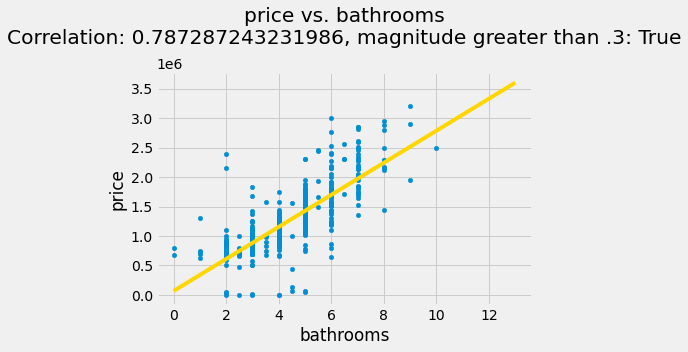

In [50]:
linear_correlation(vienna_prop_details, 'bathrooms', 'price', True)

Now that our linear regression function works, we can create a dictionary of features correlation with price.

,Feature,Correlation with Price
0,bathroomsFull,0.795574
1,bathrooms,0.787287
2,livingArea,0.778347
3,yearBuilt,0.611937
4,bedrooms,0.557198
5,garageSpaces,0.420532
6,bathroomsHalf,0.384482
7,fireplaces,0.329600
8,lotAreaValue,0.313215
9,stories,0.265030


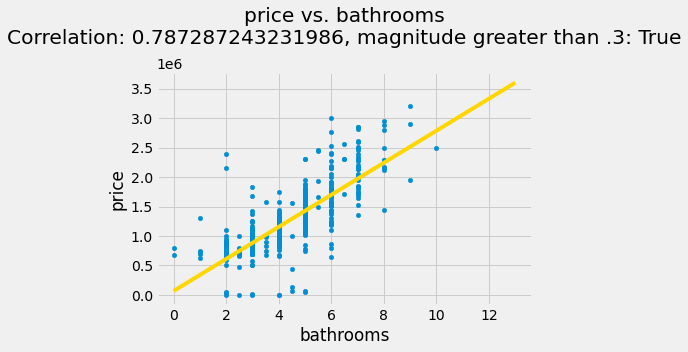

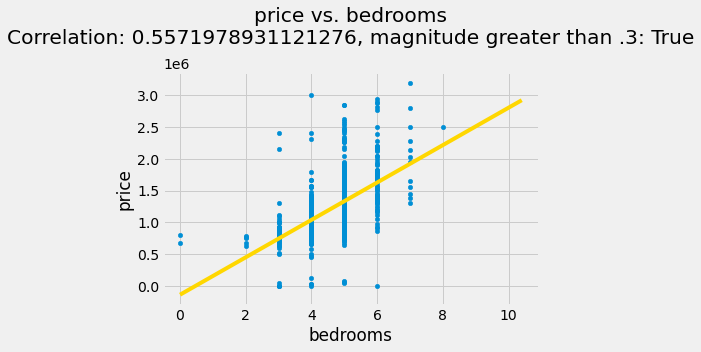

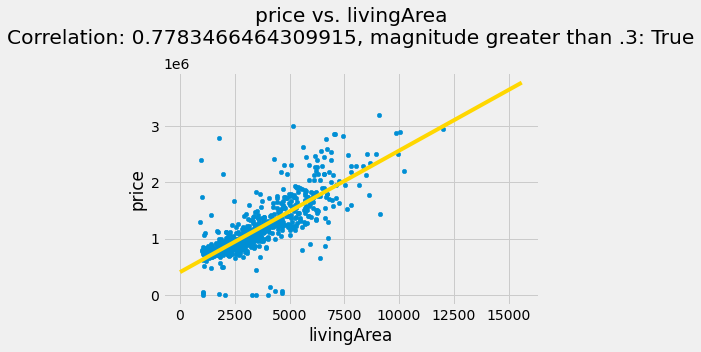

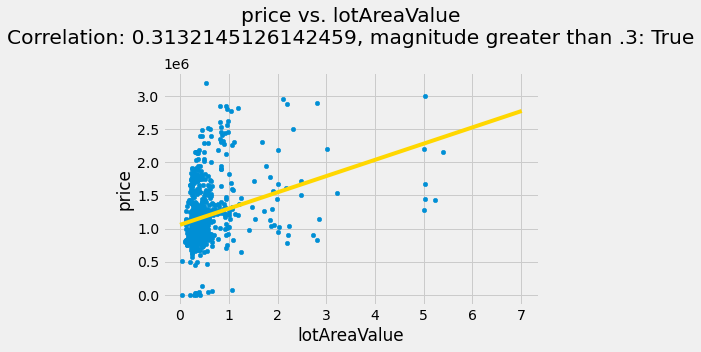

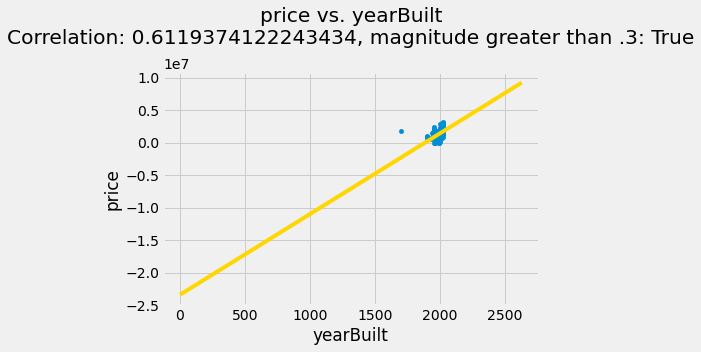

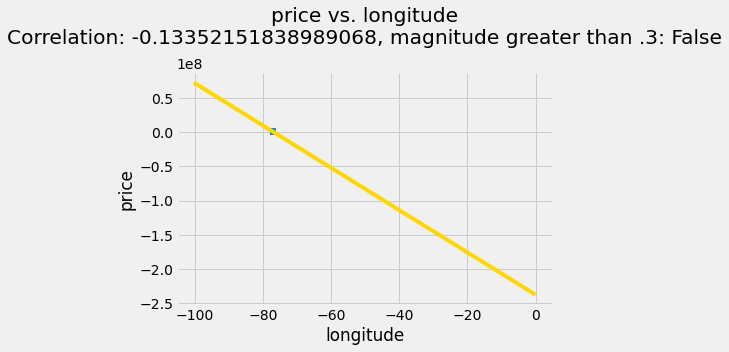

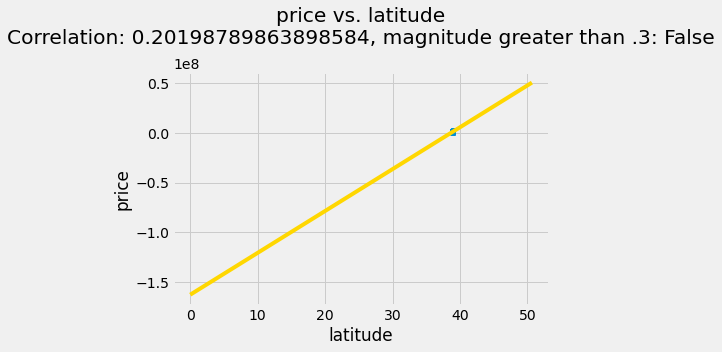

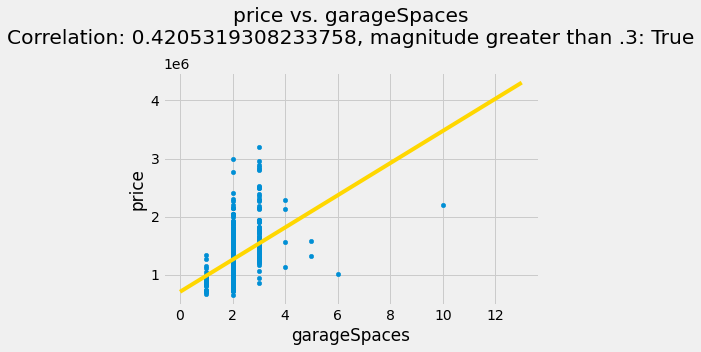

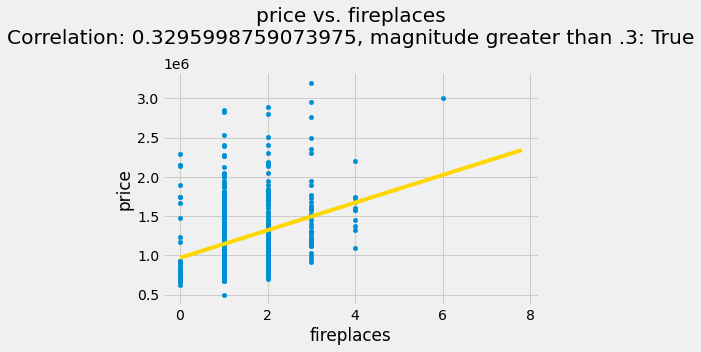

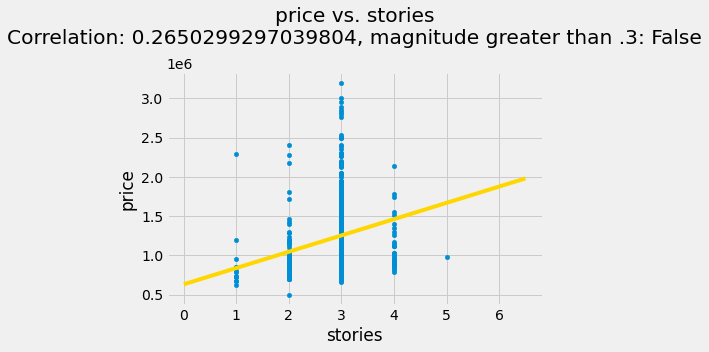

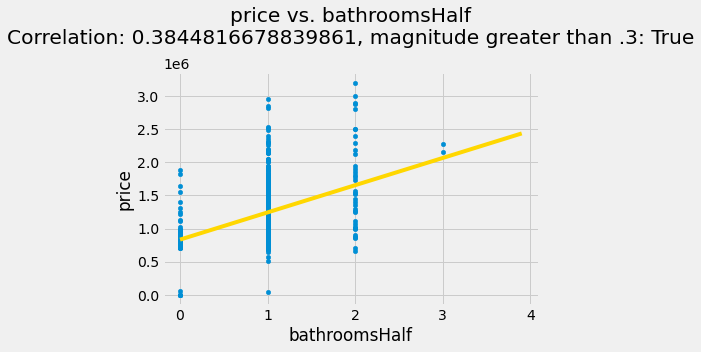

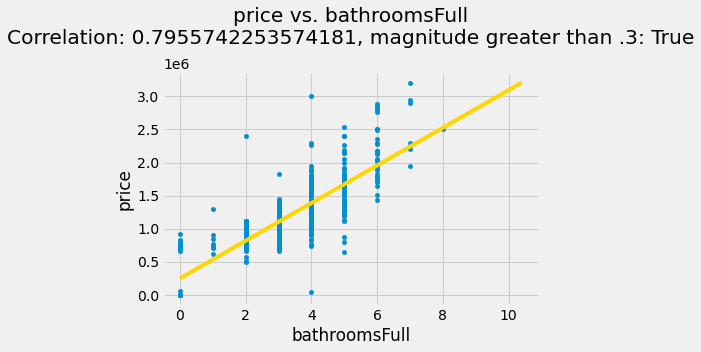

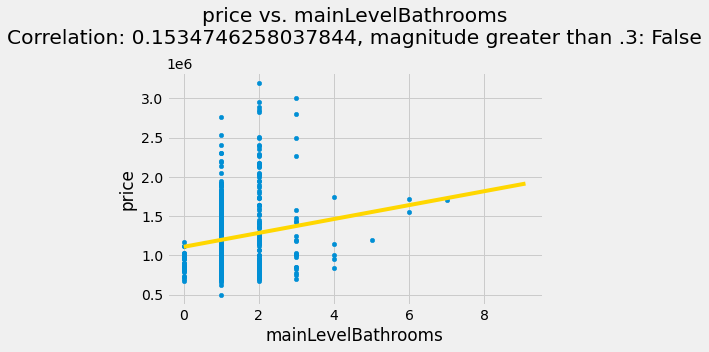

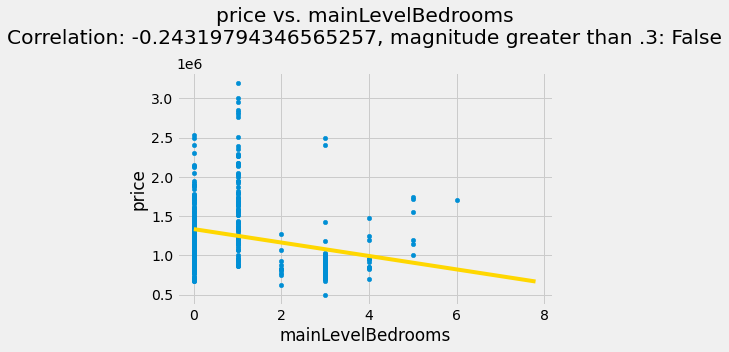

In [51]:
feature_dict = {}

#Feature we want to find the linear correlation with (must be numerical):
testing_list = [
    'bathrooms',
    'bedrooms',
    'livingArea',
    'lotAreaValue',
    'yearBuilt',
    'longitude',
    'latitude',
    'garageSpaces',
    'fireplaces',
    'stories',
    'bathroomsHalf',
    'bathroomsFull',
    'mainLevelBathrooms',
    'mainLevelBedrooms',   
]

for feature in testing_list:
    lin_cor_value = linear_correlation(vienna_prop_details, feature, 'price', False)
    feature_dict[feature] = lin_cor_value

correlation_columns = {'Feature': feature_dict.keys(), 'Correlation with Price': feature_dict.values()}
feature_vs_price = pd.DataFrame.from_dict(correlation_columns).sort_values(by=['Correlation with Price'],
                                                ascending = False).reset_index().drop('index', axis = 1)
feature_vs_price

In [26]:
# let's rename our features. Since there are only 14, we can do this manually. 
new_feature_names = ['Full Bathrooms', 'Bathrooms', 'Living Area', 'Year Built', 'Bedrooms',
                    'Garage Spaces', 'Half Bathrooms', 'Fireplaces', 'Lot Size', 'Levels',
                    'Latitude', 'Main Level Bathrooms', 'Longitude', 'Main Level Bedrooms']
feature_vs_price['Feature'] = new_feature_names
feature_vs_price

,Feature,Correlation with Price
0,Full Bathrooms,0.795574
1,Bathrooms,0.787287
2,Living Area,0.778347
3,Year Built,0.611937
4,Bedrooms,0.557198
5,Garage Spaces,0.420532
6,Half Bathrooms,0.384482
7,Fireplaces,0.329600
8,Lot Size,0.313215
9,Levels,0.265030


We will export the above table to Tablaeu and see what visualizations we can make. 

In [52]:
#feature_vs_price.to_csv('feature_correlation_with_price.csv')

# Machine Learning

Given the insights obtained from linear correlation, we can design machine learning algorithms. For example, if there is a strong correlation between bathrooms and price, a machine learning algorithm can heavily value that feature to calculate the most similar properties. Through processes like these, estimators of home value can be designed that use data from recently sold comparable properties. In real estate, recently sold comparable properties are important considerations when pricing a home. 

NOTE: The code below was derived from a previous personal project I complete in Dec 2021 - Jan 2022. I chose to include it because it shows application of the analysis above from a technical standpoint, and can relate nicely to this project.  

In [53]:
#standard_table - converts specified columns of a pandas dataframe to standard units. 

def standard_table(labels, df):
    '''The labels parameter should be a list or numpy array containing the columns that are to be standardized. 
    The df parameter should be a pandas dataframe containing the columns to be standardized.'''
    new_df = df.copy()
    for label in labels:
        #new_table = table.where(label, are.above(-200))
        col = new_df[label].tolist()
        standard_col = standard_list(col)
        new_df = new_df.replace(new_df[label].values, pd.Series(standard_col))
    return new_df

How can we normalize potentially usefull columnns with a high proportion of null data? The following code make help. 

In [54]:
def normalize(labels, df): 
    new_df = df.copy()
    for label in labels:
        new_df[label]=(df[label]-df[label].min())/(df[label].max()-df[label].min())
    return new_df

#test: 
max(normalize(['bathroomsHalf'], vienna_prop_details)['bathroomsHalf'])
#It works :)

1.0

### Removing incorrect datapoints: 

Some data points appear to have erroneous values that can interfere with how the machine learning model trains. For example, while a house may have sold for 2 million dollars, from time to time it may be observed that the house price was entered as $2,000 by mistake.

In [57]:
def remove_low_price(df, std_cutoff):
    '''Drops any properties from the dataframe with values below the standard deviation cutoff. Preliminary
    analysis suggests that a 1.5 to 1.75 std cutoff (in standard units) would be appropiate.'''
    df_copy = df.copy()
    df_stand = standard_table(['price'], df_copy)
    corrected_df = df_stand[df_stand['price'] > -1 * std_cutoff]
    new_index_column = corrected_df.index
    return df_copy.filter(new_index_column, axis = 0)

vienna_prop_details = remove_low_price(vienna_prop_details, 1.5 )
print(min(vienna_prop_details['price']))
print(max(vienna_prop_details['price']))

447075
3200000


In [58]:
# Dividing into train and test sets step 1:
# We will use a test size of 20% of our original dataset. 

from sklearn.model_selection import train_test_split
pre_vienna_train, pre_vienna_test = train_test_split(vienna_prop_details['streetAddress'], test_size = 0.2)

# Dividing into train and test sets step 2:

vienna_train = vienna_prop_details.loc[pre_vienna_train.index]
vienna_test = vienna_prop_details.loc[pre_vienna_test.index]

vienna_test
vienna_train

,streetAddress,city,address.state,zipcode,price,dateSold,datePosted,zestimate,rentZestimate,homeStatus,latitude,longitude,bathrooms,bedrooms,livingArea,bathroomsHalf,bathroomsFull,mainLevelBathrooms,mainLevelBedrooms,yearBuilt,flooring,aboveGradeFinishedArea,belowGradeFinishedArea,carportSpaces,garageSpaces,parking,hasAttachedGarage,fireplaces,hasPrivatePool,spaFeatures,waterSource,sewer,lotSize,stories,levels,basement,elementarySchool,middleOrJuniorSchool,highSchool,architecturalStyle,interiorFeatures,hasAssociation,subdivisionName,heating,cooling,taxAnnualAmount,builderName,pricePerSquareFoot,listed_by.business_name,description,priceHistory,taxHistory,zpid,lotAreaUnit,lotAreaValue
269,107 Yeonas Cir SE,Vienna,VA,22180,780000,2021-09-24,2021-08-18,994400.0,3234.0,RECENTLY_SOLD,38.889100,-77.248590,3.0,4.0,1196.0,NaN,3.0,2.0,3.0,1959.0,NaN,"1,196",0,NaN,NaN,0,False,0.0,NaN,NaN,['Public'],['Public Sewer'],0.34 Acres,2.0,Two,Finished,NaN,NaN,NaN,Ranch/Rambler,NaN,False,Vienna Woods,"['Forced Air', 'Electric']","['Central A/C', 'Electric']",8880.0,NaN,652.0,RLAH Real Estate,The perfect lot you've been waiting for! This ...,"[{'priceChangeRate': 0.11428730612472, 'date':...","[{'time': 1613191390582, 'valueIncreaseRate': ...",51776833,acres,0.340000
702,10232 Brittenford Dr,Vienna,VA,22182,1175000,2021-05-12,2021-04-09,1223000.0,4812.0,RECENTLY_SOLD,38.946224,-77.297874,4.0,4.0,3740.0,1.0,3.0,1.0,NaN,1998.0,"['Hardwood', 'Ceramic Tile', 'Carpet', 'Wood F...","3,740",NaN,NaN,3.0,3,True,1.0,NaN,NaN,['Public'],['Public Sewer'],0.60 Acres,3.0,Three,"Finished,Improved,Heated,Walkout Level,Windows",Sunrise Valley,Hughes,South Lakes,Colonial,"['Additional Stairway', 'Breakfast Area', 'Din...",True,Hunter Mill Estates,"['Forced Air', 'Natural Gas']","['Central A/C', 'Zoned', 'Electric']",10997.0,Toll Brothers,314.0,Samson Properties,Beautiful colonial home in sought after Hunter...,"[{'priceChangeRate': 0.021739130434783, 'date'...","[{'time': 1613192002845, 'valueIncreaseRate': ...",51724153,acres,0.600000
394,10198 Cedar Pond Dr,Vienna,VA,22182,1327000,2021-08-06,2021-07-09,1373500.0,5361.0,RECENTLY_SOLD,38.925266,-77.298350,4.0,4.0,3174.0,1.0,3.0,1.0,NaN,1979.0,"['Hardwood', 'Carpet', 'Ceramic Tile', 'Wood F...","2,649",525,NaN,2.0,6,True,2.0,NaN,"['Private', 'Heated', 'Hot Tub']",['Public'],['Public Sewer'],0.92 Acres,3.0,Three,Partial,Oakton,Thoreau,Madison,Colonial,"['Breakfast Area', 'Built-in Features', 'Ceili...",False,Hunter Mill Forest,"['Forced Air', 'Heat Pump', 'Natural Gas']","['Central A/C', 'Ceiling Fan(s)', 'Programmabl...",11022.0,NaN,418.0,"McEnearney Associates, Inc.",This is it! Gorgeous Colonial with Curb Appeal...,"[{'priceChangeRate': 0.062449959967974, 'date'...","[{'time': 1613191565494, 'valueIncreaseRate': ...",51744300,acres,0.920000
489,211 Battle St SW,Vienna,VA,22180,1790000,2021-07-01,2021-05-26,1854100.0,7242.0,RECENTLY_SOLD,38.896046,-77.263550,6.0,6.0,4993.0,1.0,5.0,2.0,1.0,2019.0,"['Hardwood', 'Carpet', 'Wood Floors']","3,676","1,317",NaN,2.0,6,True,2.0,NaN,NaN,['Public'],['Public Sewer'],"10,454 sqft",3.0,Three,"Full,Finished",Vienna,Thoreau,Madison,Craftsman,"['Ceiling Fan(s)', 'Central Vacuum', 'Combinat...",False,West Vienna Woods,"['Forced Air', 'Natural Gas']","['Central A/C', 'Electric']",19345.0,Fisher Custom Homes,359.0,KW United,Why wait to build when you can have your dream...,"[{'priceChangeRate': 0.022857142857143, 'date'...","[{'time': 1613191696901, 'valueIncreaseRate': ...",51772605,acres,0.240000
429,9709 Middleton Ridge Rd,Vienna,VA,22182,1450000,2021-07-23,2021-07-01,1499100.0,5868.0,RECENTLY_SOLD,38.960327,-77.281640,5.0,5.0,5725.0,1.0,4.0,1.0,0.0,1988.0,"['Hardwood', 'Carpet', 'Tile/Brick', 'Wood Flo...","4,180","1,545",NaN,2.0,6,True,2.0,NaN,NaN,['Public'],['Public Sewer'],0.46 Acres,3.0,Three,"Full,Heated,Improved,Interior Entry,Exterior E...",Colvin Run,Cooper,Langley,Colonial,"['Bar', 'Built-in Features', 'Cedar Closet(s)'...",True,Middleton Two,"['Central', 'Forced Air', 'Pro

In [59]:
#To make sure our Train an Test sets represent the original data set well:

print('\n Vienna Property Details Means(original dataset)\n')
print(vienna_prop_details[['price', 'lotAreaValue', 'longitude', 'latitude', 'bedrooms', 'bathrooms',
                   'livingArea']].mean(axis=0))
print('\n \n Vienna Property Details Test Means\n')
print(vienna_test[['price', 'lotAreaValue', 'longitude', 'latitude', 'bedrooms', 'bathrooms',
                   'livingArea']].mean(axis=0))
print('\n \n Vienna Property Details Train Means\n')
print(vienna_train[['price', 'lotAreaValue', 'longitude', 'latitude', 'bedrooms', 'bathrooms',
                   'livingArea']].mean(axis=0))


 Vienna Property Details Means(original dataset)

price           1.213790e+06
lotAreaValue    5.593308e-01
longitude      -7.726982e+01
latitude        3.891270e+01
bedrooms        4.531818e+00
bathrooms       4.151515e+00
livingArea      3.661798e+03
dtype: float64

 
 Vienna Property Details Test Means

price           1.182284e+06
lotAreaValue    6.003971e-01
longitude      -7.727135e+01
latitude        3.891220e+01
bedrooms        4.568182e+00
bathrooms       4.223485e+00
livingArea      3.744015e+03
dtype: float64

 
 Vienna Property Details Train Means

price           1.221666e+06
lotAreaValue    5.490643e-01
longitude      -7.726943e+01
latitude        3.891283e+01
bedrooms        4.522727e+00
bathrooms       4.133523e+00
livingArea      3.641244e+03
dtype: float64


The functions below are functions I designed in the past for simple machine learning for real estate. Using the factors that have a strong association with price can be useful. I have included this code to show more about my interersts and show how the project above can be applicable from a technical standpoint. Enjoy!

In [122]:
def unweighted_standard_est(address, test, train, feature_list):
    '''This function gives an estimate for a property using the prices of recently sold houses. Address is the
    address of a property, train is a pandas dataframe containing recently sold properties in an area, and
    feature_list is a list of the features (ex. bathrooms) that we would like to use to find the most similar 
    recently sold houses to base our estimate on. All features are weighted equally, thus making it an unweighted 
    estimator (hence the name)'''
    df_copy = train.copy(deep=True)
    df_appended = df_copy.append( test[test['address'] == address] )
    standard_df = standard_table(feature_list, df_appended)
    standard_df = standard_df.reset_index()
    dist_col = []
    for index in np.arange(len(standard_df)):
        dist_list = []
        for feature in feature_list:
            dist_component = (standard_df.at[index, feature] - standard_df.at[(len(standard_df) - 1), feature]) **2
            dist_list.append(dist_component)
        dist = sum(dist_list) ** 0.5
        dist_col.append(dist)
    standard_df['distance'] = dist_col
    standard_df = standard_df.sort_values(by=['distance'])
    comps = standard_df.drop(index = len(standard_df) - 1).take(np.arange(5))
    return np.average(comps['price'].to_numpy())

In [245]:
def weighted_standard_est(address, df_fs, df_sold, feature_dict):
    '''Rather than taking in a feature list like the standard_est function defined above, this function takes
    in a dictionary where the keys are the features, and the values are the weight you would like to assign to a 
    feature, where 1.0 represents 100%. If you would like to assign less weight to a feature, then 0.7 may be an
    appropiate weight. Vice versa for assigning more weight to a feature. The ratio of the weights assigned to each
    feature is ultimately the most important.'''
    df_copy = df_sold.copy(deep=True)
    df_appended = df_copy.append( df_fs[df_fs['address'] == address] )
    standard_df = standard_table(feature_list, df_appended)
    standard_df = standard_df.reset_index()
    dist_col = []
    for index in np.arange(len(standard_df)):
        dist_list = []
        for feature, weight in feature_dict.items():
            dist_component = (standard_df.at[index, feature] - standard_df.at[(len(standard_df) - 1), feature]) **2
            dist_list.append(dist_component * weight)
        dist = sum(dist_list) ** 0.5
        dist_col.append(dist)
    standard_df['distance'] = dist_col
    standard_df = standard_df.sort_values(by=['distance'])
    comps = standard_df.drop(index = len(standard_df) - 1).take(np.arange(5))
    return np.average(comps['price'].to_numpy())

In [246]:
def test_estimator(test, train, estimate_func, feature_list_or_dict, visualization = 'no'):
    '''Tests a given estimator by returning a tabel with percent error in home value prediction for each 
    home in the test set.'''
    accuracy_df = test[['address', 'price']]
    estimate_list = []
    for address in test['address']:
        test_est = estimate_func(address, mclean_sold_test, mclean_sold_train, feature_list_or_dict)
        estimate_list.append(test_est)
    accuracy_df['estimate_test'] = estimate_list
    pd.set_option('display.max_rows', 10)
    #let's compute the percentage each estimate is off by and add a percent error to the dataframe.
    percent_error_list = []
    accuracy_df['% Error'] = abs(accuracy_df['price'] - accuracy_df['estimate_test']) * 100 / accuracy_df['estimate_test']
    if visualization == 'yes':
        print('Average Percent Error: ' + str(np.average(accuracy_df['% Error'].to_numpy())) + ' %')
        print('Standard Deviation of Percent Error: ' + str(np.std(accuracy_df['% Error'].to_numpy())) + ' %')
        #accuracy_df.plot.scatter('price', '% Error')
        linear_correlation(accuracy_df, 'price', '% Error', True)
    return accuracy_df.sort_values(by=['% Error'], ascending = False)

In [247]:
def remove_low_price(df, std_cutoff):
    '''Drops any properties from the dataframe with values below the standard deviation cutoff. Preliminary
    analysis suggests that a 1.5 std cutoff (in standard units) would be appropiate.'''
    df_copy = df.copy()
    df_stand = standard_table(['price'], df_copy)
    corrected_df = df_stand[df_stand['price'] > -1 * std_cutoff]
    new_index_column = corrected_df.index
    return df_copy.filter(new_index_column, axis = 0)

In [248]:
def weighted_standard_est(address, df_fs, df_sold, feature_dict):
    '''Rather than taking in a feature list like the standard_est function defined above, this function takes
    in a dictionary where the keys are the features, and the values are the weight you would like to assign to a 
    feature, where 1.0 represents 100%. If you would like to assign less weight to a feature, then 0.7 may be an
    appropiate weight. Vice versa for assigning more weight to a feature. The ratio of the weights assigned to each
    feature is ultimately the most important.'''
    df_copy = df_sold.copy(deep=True)
    df_appended = df_copy.append( df_fs[df_fs['address'] == address] )
    standard_df = standard_table(feature_dict, df_appended)
    standard_df = standard_df.reset_index()
    dist_col = []
    for index in np.arange(len(standard_df)):
        dist_list = []
        for feature, weight in feature_dict.items():
            dist_component = (standard_df.at[index, feature] - standard_df.at[(len(standard_df) - 1), feature]) **2
            dist_list.append(dist_component * weight)
        dist = sum(dist_list) ** 0.5
        dist_col.append(dist)
    standard_df['distance'] = dist_col
    standard_df = standard_df.sort_values(by=['distance'])
    comps = standard_df.drop(index = len(standard_df) - 1).take(np.arange(5))
    return np.average(comps['price'].to_numpy())

## Example function call:
# weighted_standard_est('1939 Rockingham St, McLean, VA 22101', mclean_sold_test, mclean_sold_train, {'bedrooms':0.4, 
#                         'bathrooms':0.8, 'livingArea': 0.8, 'longitude': 0.9, 'latitude': 0.9}) 

In [249]:
def optimal_weight(feature, test_table, train_table, step_size, interval, features):
    #This function may take a few seconds or minutes to run. In order to minimize wait time, it may be helpful
    # to limit the function to a relatively small interval of iterations.
    '''This function determines the optimal weight for a feature in order to determine the value of a property'''
    '''The feature parameter is the feature whose optimal weighting we want to determine. Test and Train tables are
    als used as parameters so the accuracy can be determined. the step_size parameter represents the distance between
    each value we are iterating through. Features are the other features we will consider. The goal is to minimize
    percent error.'''
    feature_dict = {}
    for item in features:
        #The weight of all other features will be set at 1
        feature_dict[item] = 1
    iterations = np.arange(interval[0], interval[1], step_size)
    error_list = []
    for step in iterations:
        feature_dict[feature] = step
        iter_accuracy_df = test_estimator(test_table, train_table, weighted_standard_est, feature_dict)
        percent_error = np.average(iter_accuracy_df['% Error'].to_numpy())
        error_list.append(percent_error)
    iterations = iterations.tolist()
    print(iterations)
    print(error_list)
    error_df = pd.DataFrame(data = {'weight': iterations, '% Error': error_list})
#     error_df['weight'] = iterations.to_list()
#     error_df['% Error'] = error_list
    return error_df

In [250]:
def find_optimal_feature_weight(feature, feature_dict, test_table, train_table, step_size, interval, revise_dict = True):
    #This function may take a few seconds or minutes to run. In order to minimize wait time, it may be helpful
    # to limit the function to a relatively small interval of iterations.
    '''This function determines the optimal weight for a feature in order to determine the value of a property AND
    alters a feature dictionary if optimal weighting is found.'''
    '''The feature parameter is the feature whose optimal weighting we want to determine. Test and Train tables are
    als used as parameters so the accuracy can be determined. the step_size parameter represents the distance between
    each value we are iterating through. Features are the other features we will consider. The goal is to minimize
    percent error.'''
    #feature_dict = {}
    #for item in features:
        #The weight of all other features will be set at 1
        #feature_dict[item] = 1
    iterations = np.arange(interval[0], interval[1], step_size)
    error_list = []
    #to make sure an orginal and more accurate dictionary value is not overwritten, we will append the original 
    # weight to the table
    original_weight = feature_dict[feature]
    original_error_df = (test_estimator(test_table, train_table, weighted_standard_est, feature_dict))
    original_error = np.average(original_error_df['% Error'].to_numpy())
    for step in iterations:
        feature_dict[feature] = step
        iter_accuracy_df = test_estimator(test_table, train_table, weighted_standard_est, feature_dict)
        percent_error = np.average(iter_accuracy_df['% Error'].to_numpy())
        error_list.append(percent_error)
    iterations = iterations.tolist()
    error_list.append(original_error)
    iterations.append(original_weight)
    print(iterations)
    print(error_list)
    error_df = pd.DataFrame(data = {'weight': iterations, '% Error': error_list})
    error_df = error_df.sort_values(by=['% Error'])
    if revise_dict == True:
        feature_dict[feature] = error_df['weight'].to_numpy().item(0)
        print('revision = True')
        return feature_dict
#     error_df['weight'] = iterations.to_list()
#     error_df['% Error'] = error_list
    return error_df